In [42]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, log_loss, classification_report, accuracy_score,  roc_auc_score, roc_curve, auc

In [110]:
train = pd.read_csv('C:/Users/h_olv/Downloads/deep-daiv/loan_train.csv')
test = pd.read_csv('C:/Users/h_olv/Downloads/deep-daiv/loan_test.csv')

In [44]:
train

,Unnamed: 0,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,58459,57890399,14986,6848,14215.834900,58,BAT1766061,17.841656,A,G5,...,5.460927,0.692790,0,JOINT,159,0,41,16762,6137,0
1,9781,14627222,25795,5588,10972.781160,58,BAT4694572,11.655297,B,C1,...,1.390781,1.415970,0,INDIVIDUAL,141,0,21,411722,8417,0
2,50851,63209318,4200,16786,7370.911374,59,BAT1104812,10.499741,B,B4,...,4.888484,1.410109,0,INDIVIDUAL,152,0,20,70438,6932,0
3,61967,5295524,17148,21912,4840.020550,59,BAT4722912,14.274406,E,B3,...,0.842342,0.693088,0,INDIVIDUAL,145,0,17,414692,19552,0
4,8941,27540920,20848,11668,13408.689070,59,BAT1104812,10.343987,C,D4,...,2.834972,0.667659,0,INDIVIDUAL,106,0,49,49760,34135,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47219,51044,3780135,2018,10361,13283.255010,59,BAT5525466,15.342583,B,D5,...,1.301197,0.988682,0,INDIVIDUAL,16,0,30,185111,1583,0
47220,15185,14595316,29546,23786,15175.778380,59,BAT1184694,23.982598,E,E4,...,0.758903,1.357693,1,INDIVIDUAL,143,0,23,15449,8180,0
47221,63039,3159422,21221,8420,31561.520900,58,BAT2003848,6.750606,B,E4,...,0.107362,0.743569,0,INDIVIDUAL,95,0,44,77814,15956,0
47222,42402,4534856,9506,30682,11354.120990,59,BAT3193689,6.200176,D,D1,...,0.348055,1.212743,0,INDIVIDUAL,71,0,30,32198,67554,0


In [111]:
train.rename(columns = {'Employment Duration' : 'Home Ownership', 'Home Ownership' : 'Employment Duration'}, inplace = True)

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47224 entries, 0 to 47223
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    47224 non-null  int64  
 1   ID                            47224 non-null  int64  
 2   Loan Amount                   47224 non-null  int64  
 3   Funded Amount                 47224 non-null  int64  
 4   Funded Amount Investor        47224 non-null  float64
 5   Term                          47224 non-null  int64  
 6   Batch Enrolled                47224 non-null  object 
 7   Interest Rate                 47224 non-null  float64
 8   Grade                         47224 non-null  object 
 9   Sub Grade                     47224 non-null  object 
 10  Home Ownership                47224 non-null  object 
 11  Employment Duration           47224 non-null  float64
 12  Verification Status           47224 non-null  object 
 13  P

In [47]:
train.describe()

,Unnamed: 0,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Debit to Income,Delinquency - two years,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,47224.000000,4.722400e+04,47224.000000,47224.000000,47224.000000,47224.000000,47224.000000,47224.000000,47224.000000,47224.000000,...,47224.000000,47224.000000,47224.000000,47224.000000,47224.000000,47224.0,47224.000000,4.722400e+04,47224.000000,47224.000000
mean,33723.137790,2.559003e+07,16842.147023,15757.808593,14627.119843,58.167775,11.865266,80509.772500,23.259671,0.326931,...,1.160839,59.577048,1.122379,0.021536,71.139738,0.0,142.844253,1.602618e+05,23082.288963,0.092220
std,19477.700847,2.108085e+07,8361.875310,8144.238979,6773.434634,3.351086,3.713236,44998.317649,8.453230,0.802257,...,5.287202,357.158521,3.446596,0.145163,43.262861,0.0,714.093398,1.393696e+05,20871.011881,0.289339
min,0.000000,1.297933e+06,1014.000000,1014.000000,1129.708853,36.000000,5.320159,14573.537170,0.675299,0.000000,...,0.000004,0.000190,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,16831.750000,6.549061e+06,10004.000000,9270.750000,9841.754930,58.000000,9.326780,51590.807850,16.717303,0.000000,...,0.021082,1.639534,0.476460,0.000000,35.000000,0.0,24.000000,5.043925e+04,8172.000000,0.000000
50%,33625.500000,1.782091e+07,16065.500000,13020.500000,12827.552670,59.000000,11.389949,69334.966340,22.570085,0.000000,...,0.043259,3.359693,0.777921,0.000000,68.000000,0.0,35.000000,1.194040e+05,16693.000000,0.000000
75%,50627.500000,4.273280e+07,22090.000000,21784.000000,17787.776040,59.000000,14.217990,94519.457875,29.983267,0.000000,...,0.071965,5.462877,1.069104,0.000000,104.000000,0.0,46.000000,2.292718e+05,32033.750000,0.000000
max,67461.000000,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.070004,406561.536400,39.629862,8.000000,...,42.618882,4354.467519,50.847053,1.000000,161.000000,0.0,16421.000000,1.177412e+06,197112.000000,1.000000


In [48]:
train.isnull().sum()

Unnamed: 0                      0
ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Home Ownership                  0
Employment Duration             0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Ty

In [49]:
train.nunique()

Unnamed: 0                      47224
ID                              47224
Loan Amount                     23997
Funded Amount                   21452
Funded Amount Investor          47209
Term                                3
Batch Enrolled                     41
Interest Rate                   47218
Grade                               7
Sub Grade                          35
Home Ownership                      3
Employment Duration             47219
Verification Status                 3
Payment Plan                        1
Loan Title                        109
Debit to Income                 47219
Delinquency - two years             9
Inquires - six months               5
Open Account                       36
Public Record                       5
Revolving Balance               18031
Revolving Utilities             47222
Total Accounts                     69
Initial List Status                 2
Total Received Interest         47219
Total Received Late Fee         47190
Recoveries  

Payment Plan과 Accounts Delinquent는 모두 같은 값을 가지므로 의미없는 열이라고 생각하여 drop한다

In [112]:
train.drop(['Payment Plan', 'Accounts Delinquent', 'Unnamed: 0'], axis=1, inplace=True)
test.drop(['Payment Plan', 'Accounts Delinquent', 'Unnamed: 0'], axis=1, inplace=True)

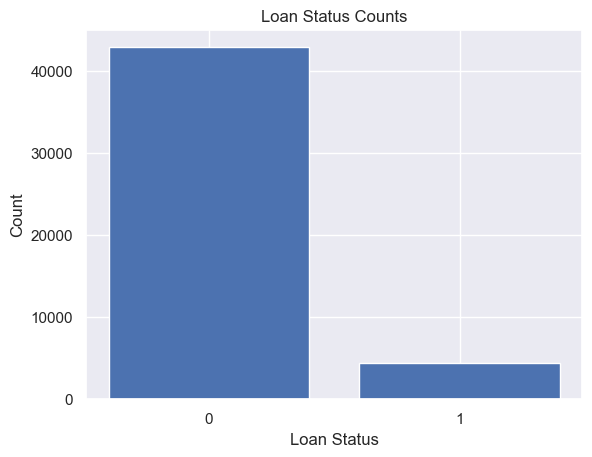

In [51]:
status_counts = train['Loan Status'].value_counts()

plt.bar(status_counts.index, status_counts.values)

plt.title('Loan Status Counts')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])

plt.show()

In [52]:
train['Loan Status'].sum()

4355

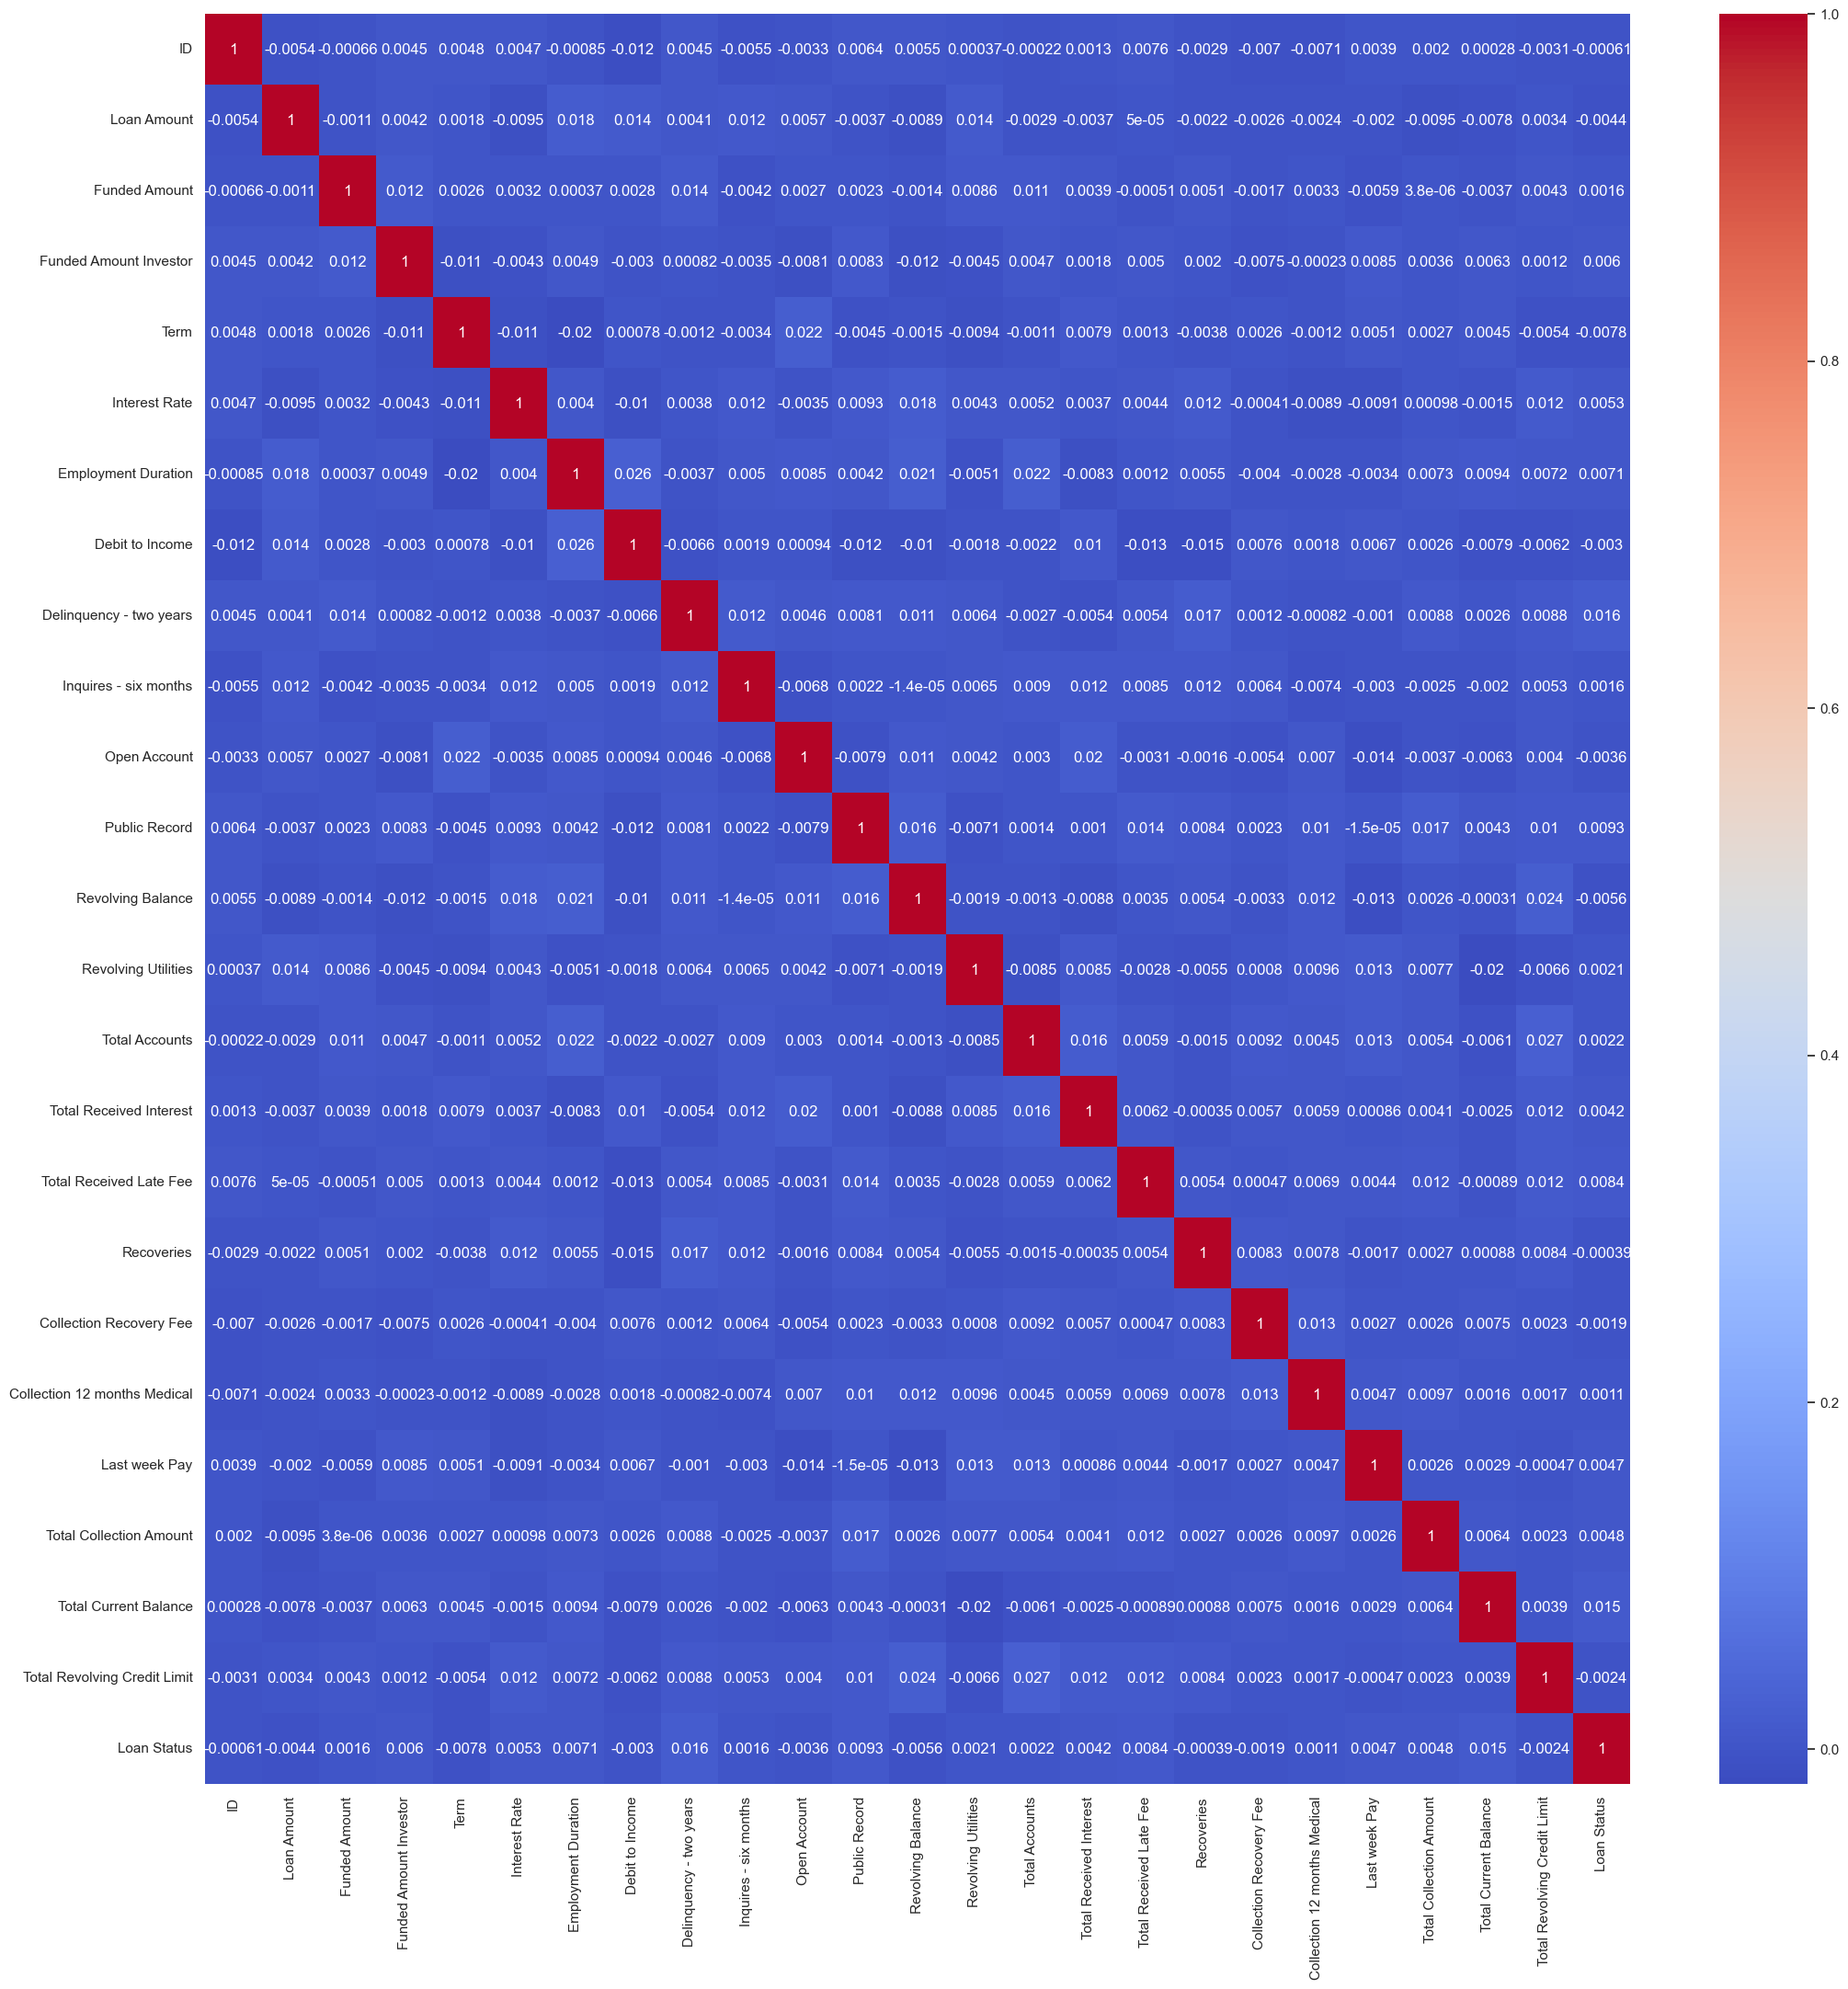

In [53]:
plt.figure(figsize=(25,25))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True)
plt.show()

In [54]:
cor_matrix = train.corr()
target_cor = cor_matrix['Loan Status']
sort_cor = target_cor.abs().sort_values(ascending=False)
print(sort_cor)

Loan Status                     1.000000
Delinquency - two years         0.015893
Total Current Balance           0.014800
Public Record                   0.009347
Total Received Late Fee         0.008435
Term                            0.007789
Employment Duration             0.007058
Funded Amount Investor          0.005980
Revolving Balance               0.005640
Interest Rate                   0.005342
Total Collection Amount         0.004794
Last week Pay                   0.004690
Loan Amount                     0.004368
Total Received Interest         0.004237
Open Account                    0.003621
Debit to Income                 0.003041
Total Revolving Credit Limit    0.002437
Total Accounts                  0.002164
Revolving Utilities             0.002074
Collection Recovery Fee         0.001937
Funded Amount                   0.001647
Inquires - six months           0.001619
Collection 12 months Medical    0.001115
ID                              0.000608
Recoveries      

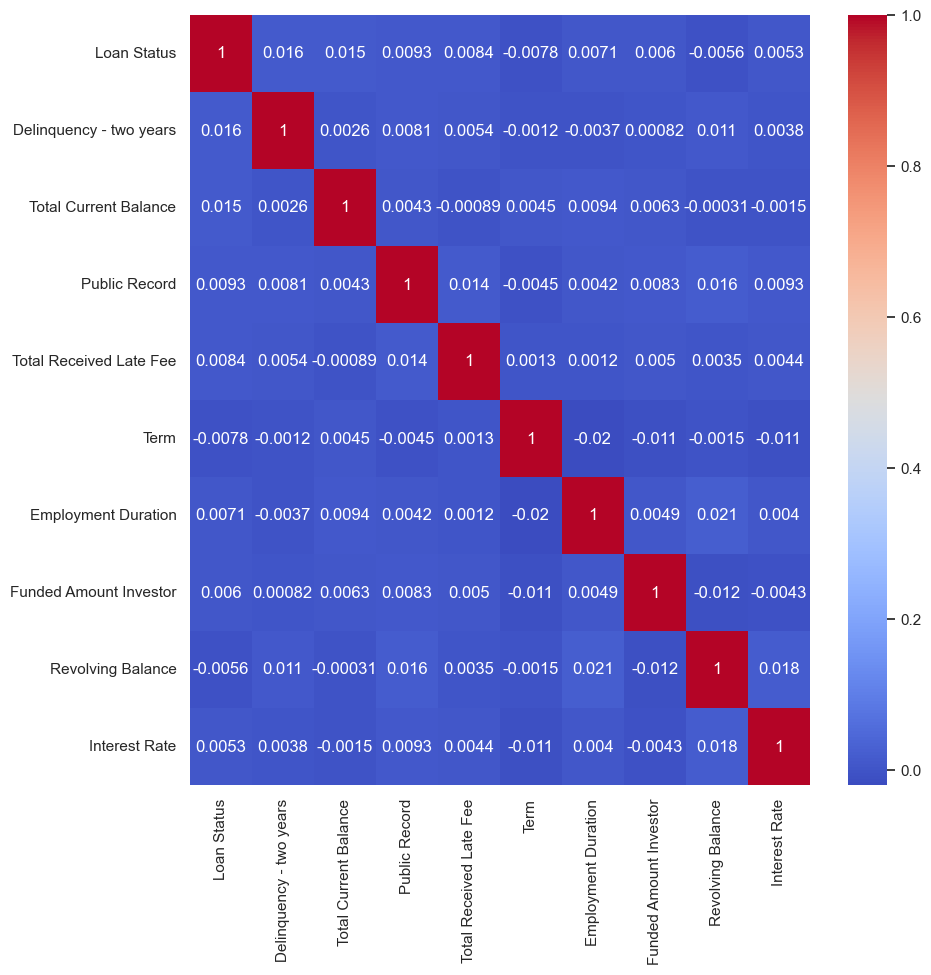

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

cor_matrix = train.corr()
target_cor = cor_matrix['Loan Status']
sort_cor = target_cor.abs().sort_values(ascending=False)

top_corrs = train[sort_cor.index[:10]].corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(top_corrs, cmap='coolwarm', annot=True, ax=ax)
plt.show()

In [56]:
col = list(train.columns)
col.remove('Loan Status')
col

['ID',
 'Loan Amount',
 'Funded Amount',
 'Funded Amount Investor',
 'Term',
 'Batch Enrolled',
 'Interest Rate',
 'Grade',
 'Sub Grade',
 'Home Ownership',
 'Employment Duration',
 'Verification Status',
 'Loan Title',
 'Debit to Income',
 'Delinquency - two years',
 'Inquires - six months',
 'Open Account',
 'Public Record',
 'Revolving Balance',
 'Revolving Utilities',
 'Total Accounts',
 'Initial List Status',
 'Total Received Interest',
 'Total Received Late Fee',
 'Recoveries',
 'Collection Recovery Fee',
 'Collection 12 months Medical',
 'Application Type',
 'Last week Pay',
 'Total Collection Amount',
 'Total Current Balance',
 'Total Revolving Credit Limit']

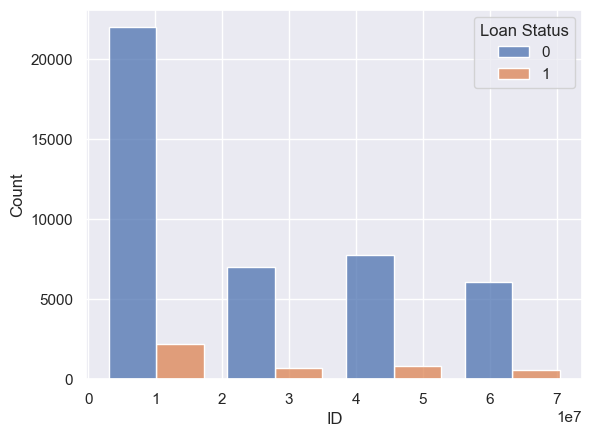

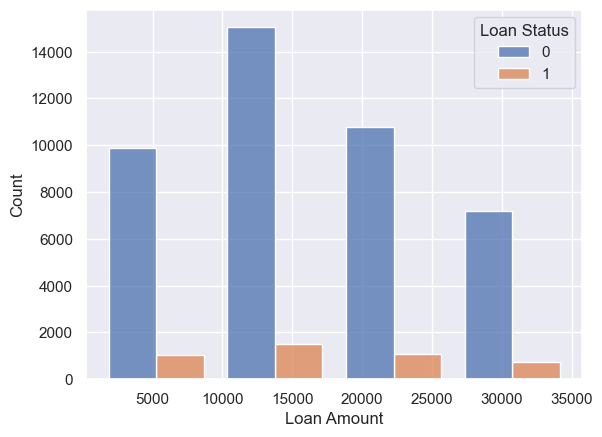

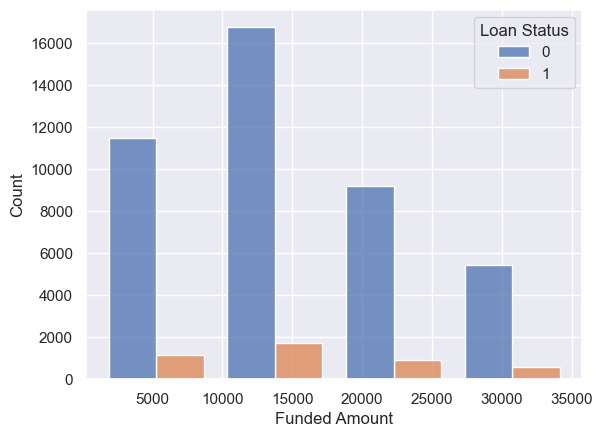

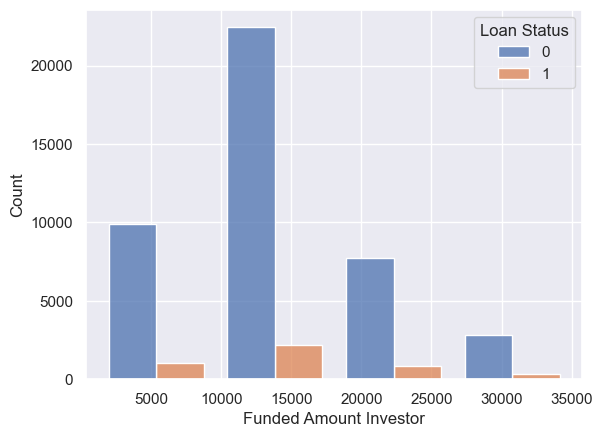

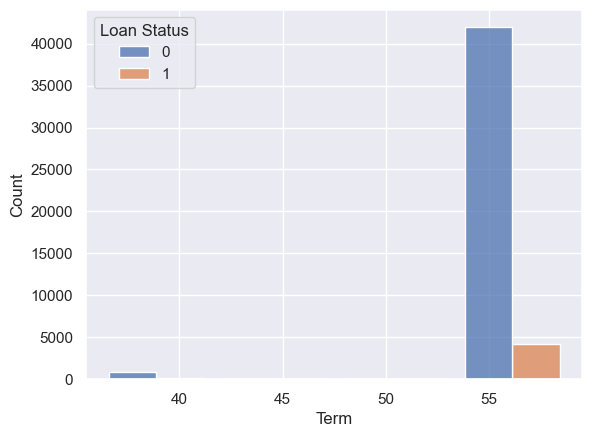

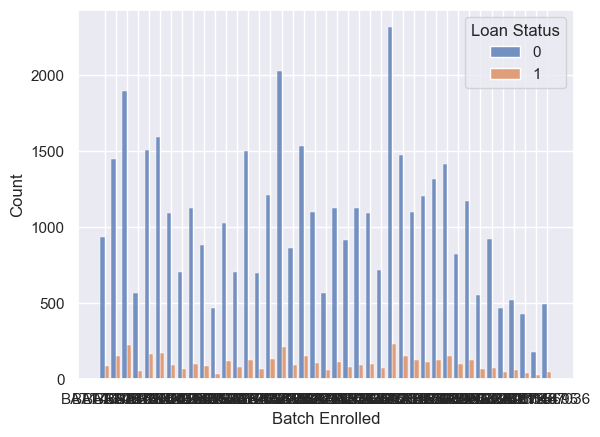

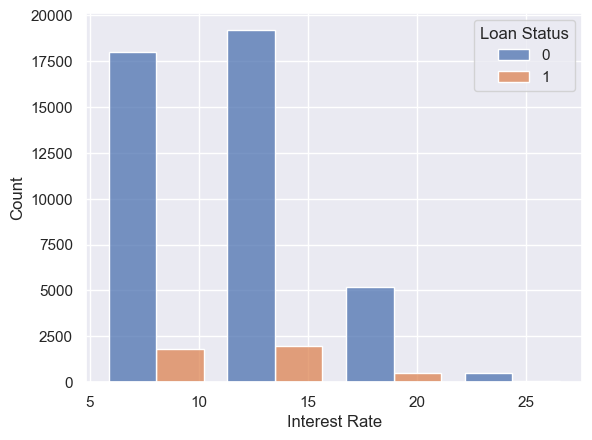

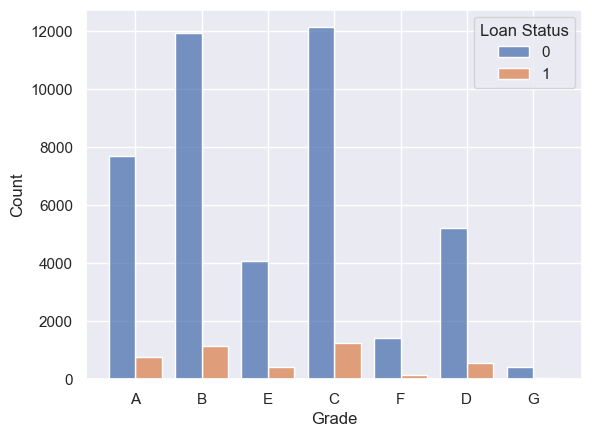

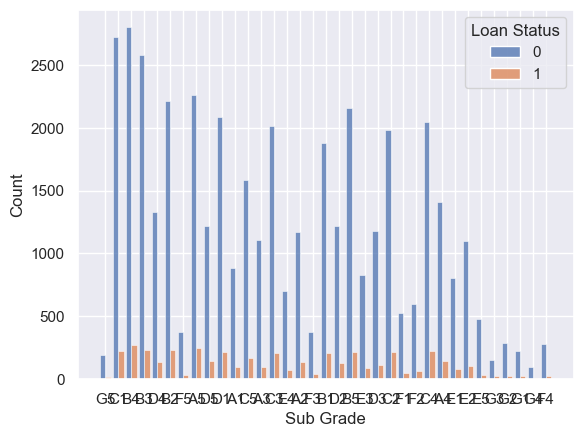

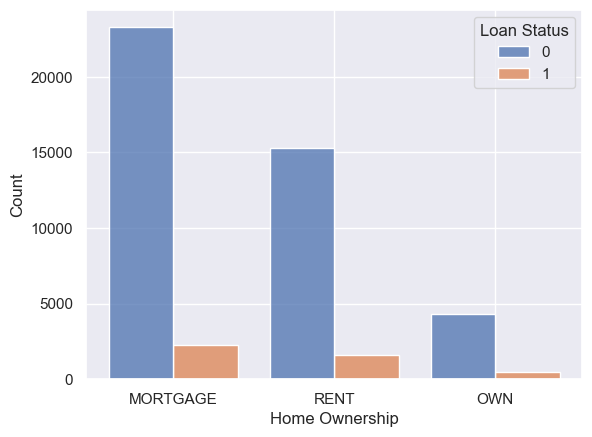

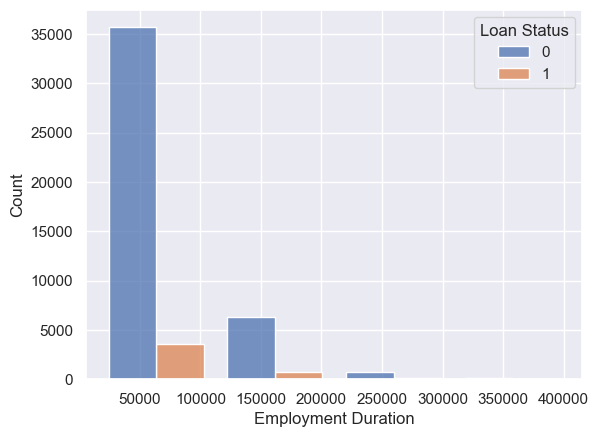

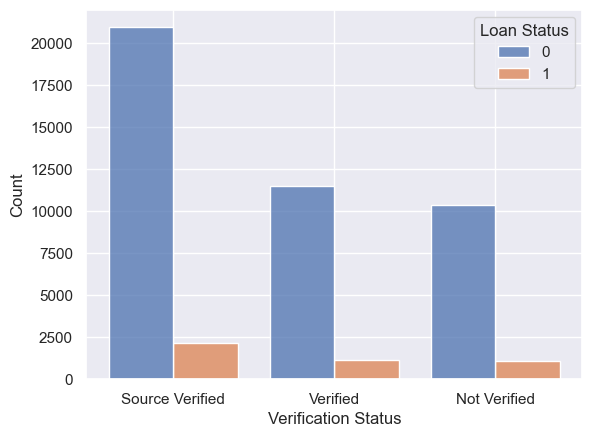

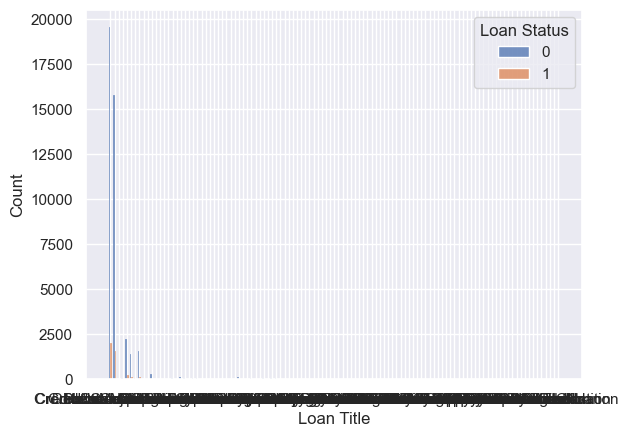

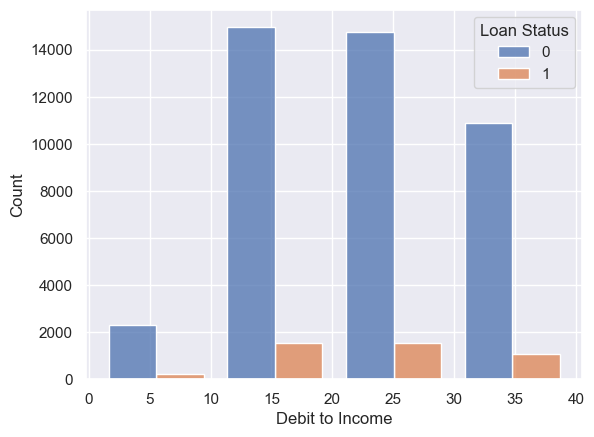

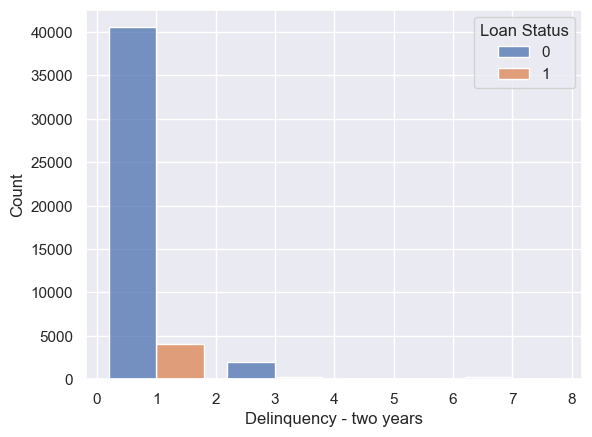

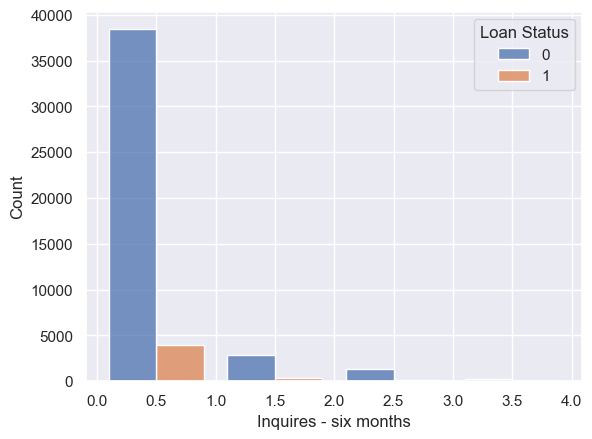

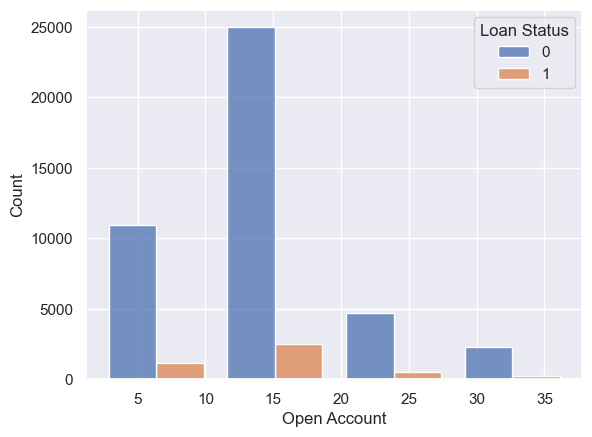

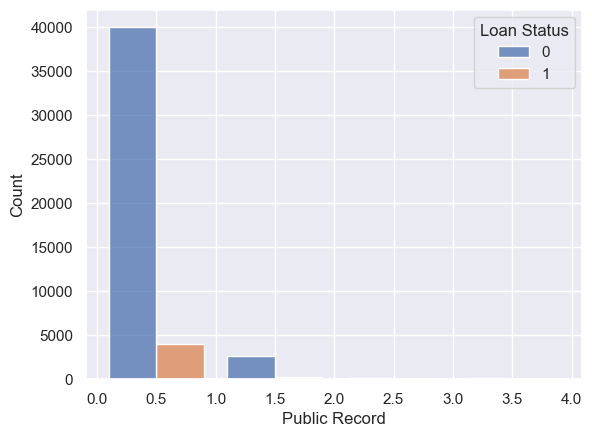

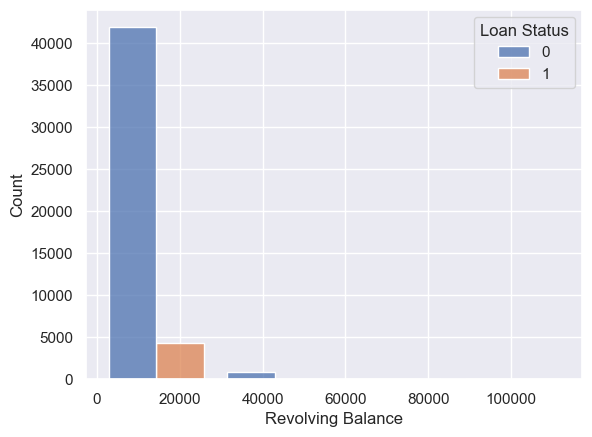

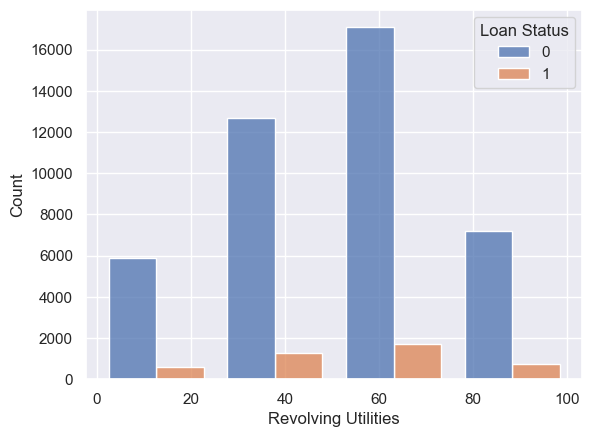

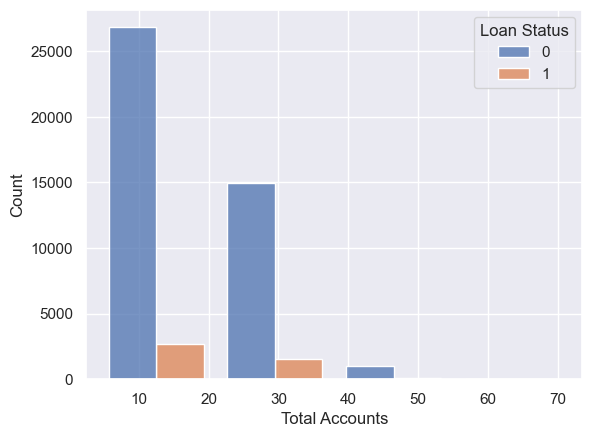

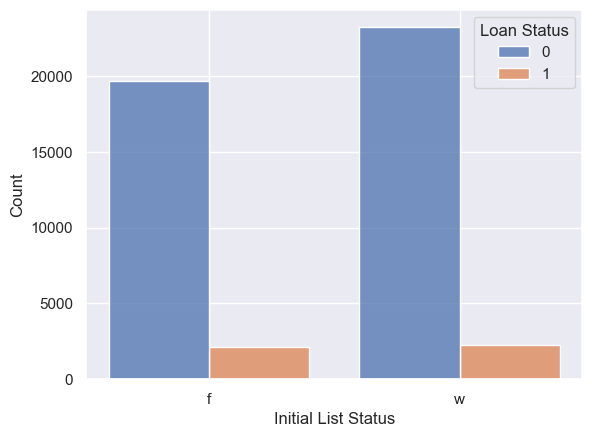

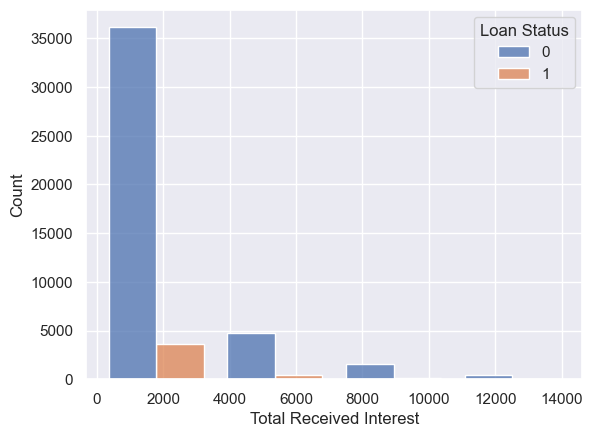

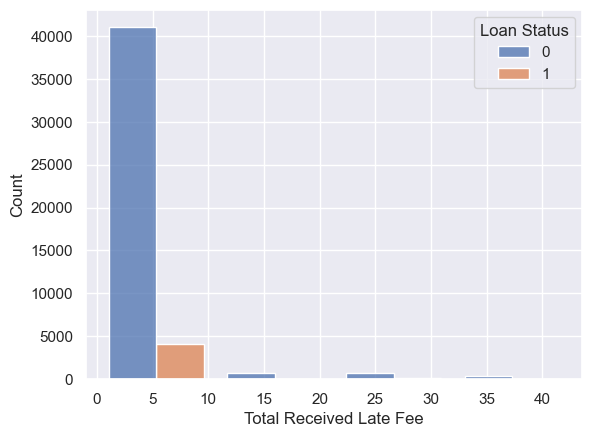

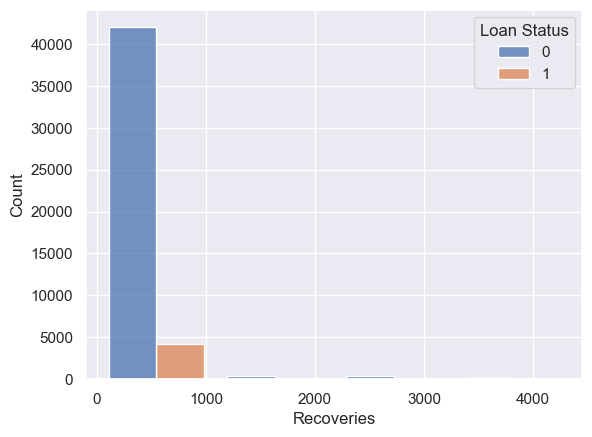

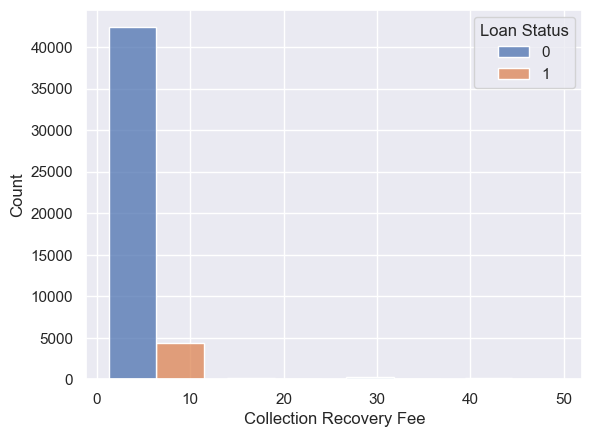

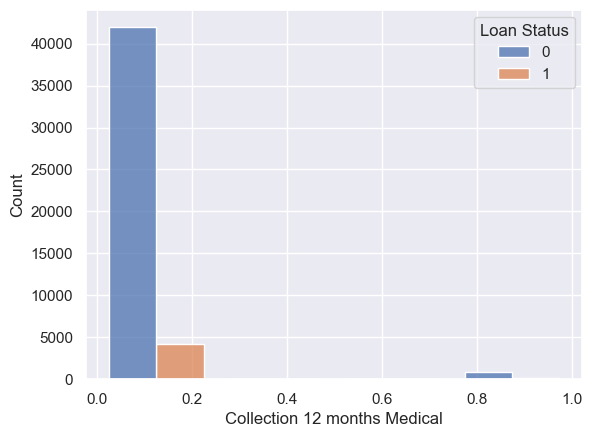

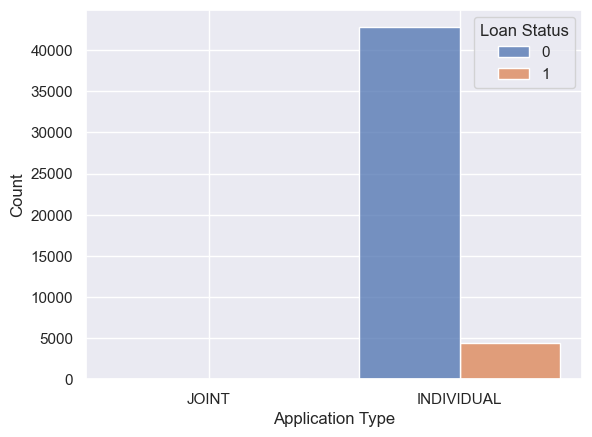

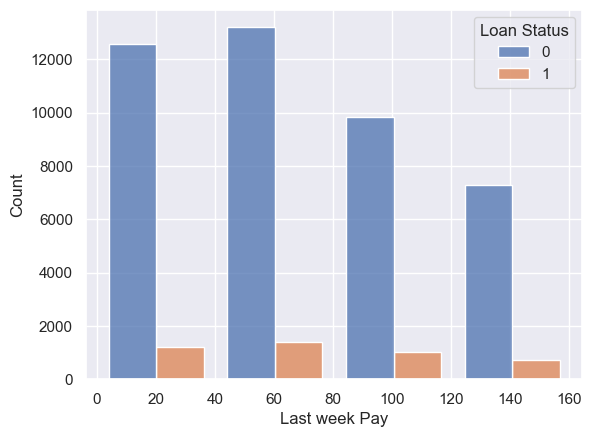

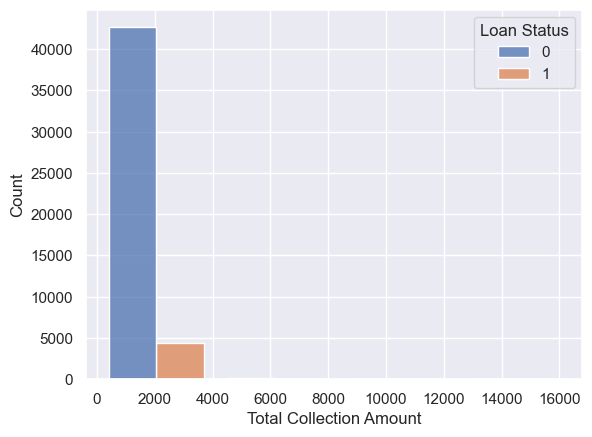

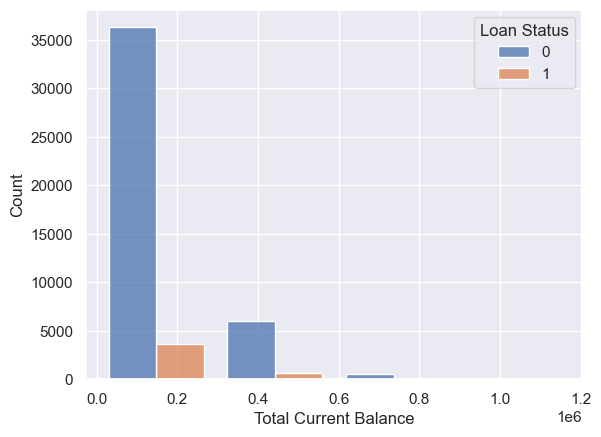

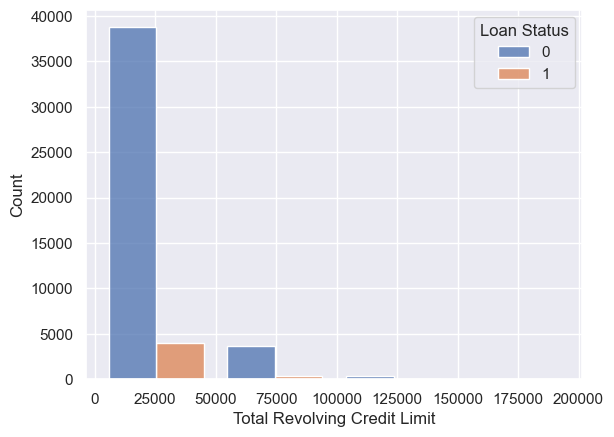

In [57]:
for i in col:
    plt.figsize=(16,6)
    sns.set_theme(style='darkgrid')
    sns.histplot(data=train, x=i, hue="Loan Status", multiple="dodge", shrink=.8, bins=4)
    plt.show()

In [58]:
train['Grade'].unique()

array(['A', 'B', 'E', 'C', 'F', 'D', 'G'], dtype=object)

In [59]:
train['Sub Grade'].unique()

array(['G5', 'C1', 'B4', 'B3', 'D4', 'B2', 'F5', 'A5', 'D5', 'D1', 'A1',
       'C5', 'A3', 'C3', 'E4', 'A2', 'F3', 'B1', 'D2', 'B5', 'E3', 'D3',
       'C2', 'F1', 'F2', 'C4', 'A4', 'E1', 'E2', 'E5', 'G3', 'G2', 'G1',
       'G4', 'F4'], dtype=object)

sub grade안에 grade가 다 표시되니까 둘 중 하나만 써도되지 않을까..? 1-5인데 5로 갈수록 낮은건가?

In [60]:
train['Delinquency - two years'].unique()

array([0, 1, 2, 8, 3, 6, 4, 7, 5], dtype=int64)

In [61]:
x = train[train['Delinquency - two years'] == 0]
print(len(x))
x['Loan Status'].sum()

36474


3321

In [62]:
train['Term'].unique()

array([58, 59, 36], dtype=int64)

대출 기간을 년 기준으로 한 열을 파생변수로 추가

In [102]:
train.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Home Ownership', 'Employment Duration', 'Verification Status',
       'Loan Title', 'Debit to Income', 'Delinquency - two years',
       'Inquires - six months', 'Open Account', 'Public Record',
       'Revolving Balance', 'Revolving Utilities', 'Total Accounts',
       'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status', 'Term Year'],
      dtype='object')

In [107]:
train['Open Account']

0        16
1        29
2         6
3        17
4         9
         ..
47219    14
47220     8
47221    29
47222    12
47223    18
Name: Open Account, Length: 47224, dtype: int64

In [108]:
train['Public Record']

0        0
1        0
2        0
3        0
4        0
        ..
47219    0
47220    0
47221    0
47222    0
47223    0
Name: Public Record, Length: 47224, dtype: int64

In [114]:
train['Loan-to-Income Ratio'] = train['Loan Amount'] / train['Debit to Income']
train['Term Year'] = (train['Term']/12).astype(int)
train['Credit Utilization Ratio'] = train['Revolving Balance'] / train['Total Revolving Credit Limit']
train['Total Credit Lines'] = train['Open Account'] + train['Public Record']
train['Interest Income'] = train['Total Received Interest'] - train['Total Received Late Fee']
train['Remaining Balance'] = train['Loan Amount'] - train['Total Current Balance']
train['Remaining Balance'] = train['Remaining Balance'].apply(lambda x: max(x, 0))
train['Payment-to-Income Ratio'] = (train['Total Received Interest'] + train['Total Received Late Fee']) / train['Debit to Income']
train['Loan-to-Value Ratio'] = train['Loan Amount'] / train['Total Current Balance']
train

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,...,Total Revolving Credit Limit,Loan Status,Loan-to-Income Ratio,Term Year,Credit Utilization Ratio,Total Credit Lines,Interest Income,Remaining Balance,Payment-to-Income Ratio,Loan-to-Value Ratio
0,57890399,14986,6848,14215.834900,58,BAT1766061,17.841656,A,G5,MORTGAGE,...,6137,0,662.268300,4,1.465374,16,4694.025059,0,207.440549,0.894046
1,14627222,25795,5588,10972.781160,58,BAT4694572,11.655297,B,C1,MORTGAGE,...,8417,0,2093.469771,4,2.157301,29,5224.350368,0,424.006868,0.062651
2,63209318,4200,16786,7370.911374,59,BAT1104812,10.499741,B,B4,RENT,...,6932,0,127.578755,4,0.320110,6,476.053643,0,14.461274,0.059627
3,5295524,17148,21912,4840.020550,59,BAT4722912,14.274406,E,B3,OWN,...,19552,0,672.083304,4,0.919394,17,203.624917,0,9.569123,0.041351
4,27540920,20848,11668,13408.689070,59,BAT1104812,10.343987,C,D4,MORTGAGE,...,34135,0,1541.081002,4,0.224110,9,642.597480,0,47.501218,0.418971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47219,3780135,2018,10361,13283.255010,59,BAT5525466,15.342583,B,D5,MORTGAGE,...,1583,0,107.088955,4,4.640556,14,464.628012,0,24.660924,0.010902
47220,14595316,29546,23786,15175.778380,59,BAT1184694,23.982598,E,E4,RENT,...,8180,0,2228.756039,4,0.480440,8,214.242715,14097,16.168445,1.912486
47221,3159422,21221,8420,31561.520900,58,BAT2003848,6.750606,B,E4,RENT,...,15956,0,665.328380,4,0.015668,29,3237.713701,0,101.512972,0.272714
47222,4534856,9506,30682,11354.120990,59,BAT3193689,6.200176,D,D1,MORTGAGE,...,67554,0,813.771999,4,0.066717,12,32.552727,0,2.791550,0.295236


In [66]:
train['Loan Title'].unique()

array(['Credit card refinancing', 'Debt consolidation',
       'Credit card refinance', 'Credit Card Consolidation',
       'Debt Consolidation', 'Home improvement', 'Consolidation', 'Other',
       'relief', 'debt consolidation loan', 'Major purchase', 'Loan',
       'credit card refinance', 'Medical', 'Pool', 'Vacation',
       'CC consolidation', 'Medical expenses', 'Moving and relocation',
       'payoff', 'Personal Loan', 'debt consolidation', 'Debt Loan',
       'House', 'consolidation loan', 'consolidate', 'Credit payoff',
       'Bathroom', 'Green loan', 'Debt Payoff', 'Consolidate', 'Business',
       'Lending Club', 'Refinance', 'Home Improvement',
       'Credit card payoff', 'Credit Card Payoff',
       'Debt Consolidation Loan', 'MYLOAN', 'Car financing',
       'Home buying', 'Home loan', 'Freedom', 'Credit Cards',
       'Credit Card Loan', 'Credit Card Debt', 'Dept consolidation',
       'refi', 'CONSOLIDATE', 'Getting Ahead', 'Car Loan', 'personal',
       'Pay Off', '

In [100]:
train.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Home Ownership', 'Employment Duration', 'Verification Status',
       'Loan Title', 'Debit to Income', 'Delinquency - two years',
       'Inquires - six months', 'Open Account', 'Public Record',
       'Revolving Balance', 'Revolving Utilities', 'Total Accounts',
       'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status', 'Term Year'],
      dtype='object')

In [90]:
train['Last week Pay'].unique() # 0~161

array([159, 141, 152, 145, 106,  44,  64,  67,  58, 144, 115,  43,  85,
       125,  76,  34, 128,  95, 121, 103,  65,  14, 146,  69,  79,  49,
        62,  21,  56,   7,  18, 114, 127,  55,  20, 149,  83, 119,  66,
        33,  45,  59, 129,  68, 108, 156, 134,  10,  52,  36, 124,  81,
        29,  12,  26,  86, 135,  71,  77,  16,  99, 138,  63,  25, 137,
        96,  47,  74,  15, 116, 111,  80,   9,  19, 153,  57,  11,  41,
        75,   8,  30,  35,  72,  87, 158,  60,  93,  31,  91,  38,  24,
        32, 148,   6, 133,  37, 155, 112,  73,  39,  61,  70, 100,  22,
        17,  78,  28, 117,   5, 113,  42,  53,  88,   4, 110,  27, 131,
       107, 132,  50,  46,  40, 161, 122,  54, 140, 102, 147, 101,  13,
        51,  94, 139,  97, 136, 130,  98, 109, 120, 123,  82, 154,  23,
       142, 143, 151,   3, 126,  84,  48,  90,  89,   1,   2, 104, 118,
       105, 160,  92, 150, 157,   0], dtype=int64)

In [94]:
train['Employment Duration'] #14573.53717 / 406561.5364

0         66291.22833
1         78002.00947
2         71538.83031
3         49315.79444
4         45261.55641
             ...     
47219     80364.70679
47220     87145.73168
47221     63148.48208
47222    124992.81440
47223     88435.18613
Name: Employment Duration, Length: 47224, dtype: float64

In [6]:
(406561 / 24) / 365

46.41107305936073

In [75]:
train.loc[1]

ID                                        14627222
Loan Amount                                  25795
Funded Amount                                 5588
Funded Amount Investor                 10972.78116
Term                                            58
Batch Enrolled                          BAT4694572
Interest Rate                            11.655297
Grade                                            B
Sub Grade                                       C1
Home Ownership                            MORTGAGE
Employment Duration                    78002.00947
Verification Status                Source Verified
Loan Title                      Debt consolidation
Debit to Income                          12.321649
Delinquency - two years                          1
Inquires - six months                            0
Open Account                                    29
Public Record                                    0
Revolving Balance                            18158
Revolving Utilities            